In [9]:
import torch.optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.nn as nn

from tqdm.notebook import tqdm

from torchvision.models import mobilenet_v3_small

import matplotlib.pyplot as plt

In [10]:
mobilenet_v3_small_model = mobilenet_v3_small(pretrained=True)

## Dataloaders

In [13]:
batch_size = 32

# Cargamos las imagenes por carpeta
train_dataset = ImageFolder('../ExportChua/',
                            # transforms.Compose([transforms.Resize((64, 64)),
                            # transforms.Grayscale(1),
                            transforms.Compose([transforms.Resize((224, 224)),
                                                transforms.ToTensor()]))
val_dataset = ImageFolder('../TestChua/Val/',
                          transforms.Compose([transforms.Resize((224, 224)),
                                              transforms.ToTensor()]))

test_dataset = ImageFolder('../TestChua/Test/',
                           transforms.Compose([transforms.Resize((224, 224)),
                                               transforms.ToTensor()]))

# Organizamos los datos en lotes y los mezclamos automáticamente
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [4]:
# Organizamos los datos en lotes y los mezclamos automáticamente
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

#Cargamos el modelo y empleamos los recursos de GPU para accelerar el aprendizaje
model= mobilenet_v3_small.cuda()
criterio = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.1)

## Show images

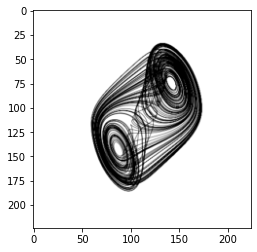

Tipo de atractor: 0 (1: regular, 0:caótico)


In [15]:
batch_index = 0
#Cargamos los datos de imágenes y labels
xs, ys = list(train_dataloader)[batch_index]

img_index = 0 #Elegir un número del 0 al 31
x_img = xs[img_index, 0].numpy()

#Mostramos una imagen de un atractor y su respectiva etiqueta
plt.imshow(x_img, cmap='gray')
plt.show()
print(f'Tipo de atractor: {int(ys[img_index])} (1: regular, 0:caótico)')

In [13]:
for epoch in range(10):
    train_loss = 0
#     for X, y in tqdm(train_dataloader):
    for X, y in train_dataloader:
        X = X.cuda()
        y = y.cuda()

        y_hat = model(X)
#         # Las salidas son un paso antes del criterio de entropía cruzada

        loss = criterio(y_hat, y)
        print(loss)
    
        optimizer.zero_grad()
        loss.backward()
#         optimizer.step() # Actualiza los parametros

#         # Acumulamos los errores por cada batch
#         # Usamos la función detach para que no se almacenen los gradientes de esta suma
#         train_loss += float(loss.detach())
    break
    print('L:', train_loss/len(train_dataloader))

tensor(0.3626, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0344, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0619, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6759, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.6813, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2475, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(8.7235e-06, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0736, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(6.7427e-07, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(4.3387e-05, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.0518, device='cuda:0', grad_fn=<Nll

RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR
You can try to repro this exception using the following code snippet. If that doesn't trigger the error, please include your original repro script when reporting this issue.

import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([4, 88, 28, 28], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(88, 24, kernel_size=[1, 1], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

ConvolutionParams 
    data_type = CUDNN_DATA_FLOAT
    padding = [0, 0, 0]
    stride = [1, 1, 0]
    dilation = [1, 1, 0]
    groups = 1
    deterministic = false
    allow_tf32 = true
input: TensorDescriptor 0x56393fc828e0
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 88, 28, 28, 
    strideA = 68992, 784, 28, 1, 
output: TensorDescriptor 0x563941b75f90
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 24, 28, 28, 
    strideA = 18816, 784, 28, 1, 
weight: FilterDescriptor 0x5638d86e9850
    type = CUDNN_DATA_FLOAT
    tensor_format = CUDNN_TENSOR_NCHW
    nbDims = 4
    dimA = 24, 88, 1, 1, 
Pointer addresses: 
    input: 0x7fa9d6ad0800
    output: 0x7fa9f7588000
    weight: 0x7faa16c0d200
Forward algorithm: 5


In [6]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([4, 88, 28, 28], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(88, 24, kernel_size=[1, 1], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

## Train

In [8]:
import time

In [16]:
for epoch in range(10):
    start = time.time()

    model.train()
    train_loss = 0
    train_progress = tqdm(enumerate(train_dataloader),
                          desc="train",
                          total=len(train_dataloader))
    for i, (X, y) in train_progress:
        X = X.cuda()
        y = y.cuda()
        y_hat = model(X)

        loss = criterio(y_hat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss.detach())
        train_progress.set_postfix(loss=(train_loss/(i+1)))
        
#         print(X.shape)
    
    model.eval()

    val_loss = 0
    with torch.no_grad():
        model.eval()
        val_progress = tqdm(enumerate(val_dataloader),
                            desc="val",
                            total=len(val_dataloader))
        for i, (X, y) in val_progress:
            X = X.cuda(non_blocking=True)
            y = y.cuda(non_blocking=True)
            y_hat = model(X)

            loss = criterio(y_hat, y)

            val_loss += float(loss)
            val_progress.set_postfix(loss=(val_loss/(i+1)))

    end = time.time()

    t_loss = train_loss / len(train_dataloader)
    v_loss = val_loss / len(val_dataloader)
    print('epoch:', epoch, 'L:', t_loss, v_loss, 'Time:', end-start)

train:   0%|          | 0/20 [00:00<?, ?it/s]

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR
You can try to repro this exception using the following code snippet. If that doesn't trigger the error, please include your original repro script when reporting this issue.

import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([4, 48, 14, 14], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(48, 144, kernel_size=[1, 1], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

ConvolutionParams 
    data_type = CUDNN_DATA_FLOAT
    padding = [0, 0, 0]
    stride = [1, 1, 0]
    dilation = [1, 1, 0]
    groups = 1
    deterministic = false
    allow_tf32 = true
input: TensorDescriptor 0x7fdb300bf830
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 48, 14, 14, 
    strideA = 9408, 196, 14, 1, 
output: TensorDescriptor 0x7fdb300c4230
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 144, 14, 14, 
    strideA = 28224, 196, 14, 1, 
weight: FilterDescriptor 0x7fdb300c6e60
    type = CUDNN_DATA_FLOAT
    tensor_format = CUDNN_TENSOR_NCHW
    nbDims = 4
    dimA = 144, 48, 1, 1, 
Pointer addresses: 
    input: 0x7fdb279cb600
    output: 0x7fdb29600000
    weight: 0x7fdb72ca9a00
Additional pointer addresses: 
    grad_output: 0x7fdb29600000
    grad_input: 0x7fdb279cb600
Backward data algorithm: 3


## Accuracies

In [12]:
model = mobilenet_v3_small_model.cuda()
epoch, arch, state_dict = torch.load('model_19_0.58371.pth.tar').values()
model.load_state_dict(state_dict)
model = model.cuda()
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [14]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in train_dataloader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Nb of samples = {n_samples}, nb of correctly predicted = {n_correct}')
    print(f'Accuracy of the network on train examples: {acc} %')
    n_correct = 0
    n_samples = 0
    
    for images, labels in val_dataloader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Nb of samples = {n_samples}, nb of correctly predicted = {n_correct}')
    print(f'Accuracy of the network on val examples: {acc} %')
    
    for images, labels in test_dataloader:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Nb of samples = {n_samples}, nb of correctly predicted = {n_correct}')
    print(f'Accuracy of the network on test examples: {acc} %')

Nb of samples = 612, nb of correctly predicted = 596
Accuracy of the network on train examples: 97.38562091503267 %
Nb of samples = 240, nb of correctly predicted = 168
Accuracy of the network on val examples: 70.0 %
Nb of samples = 1377, nb of correctly predicted = 1003
Accuracy of the network on test examples: 72.8395061728395 %


In [ ]:
batch_index = 0
xs, ys = list(val_dataloader)[batch_index] 
xs = xs.cuda()
ys = ys.cuda()

image_index = 16

outputs = model(xs)
_, predicted = torch.max(outputs, 1)
print(predicted)
print(ys) 

xs = xs.cpu()
x_img = xs[image_index, 0].numpy()
plt.imshow(x_img, cmap='gray')
plt.show()
print(f'Atractor número {image_index + 1}')
print(f'Tipo de atractor: {int(ys[image_index])} (1: regular, 0:caótico)')
xs = xs.cuda()